## Data reference:
##### https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation

In [1]:
import zipfile

try:
    with zipfile.ZipFile('./archive.zip', 'r') as zip_dir:
        zip_dir.extractall('./data')
except:
    print("Already extracted or no data")

In [2]:
from os import listdir

data = listdir('./data')
data

['valid', 'train', 'test', 'README.txt', 'train-masks']

In [3]:
from os.path import isfile, join

train_files = [f for f in listdir('./data/train') if isfile(join('./data/train', f))]
test_files = [f for f in listdir('./data/test') if isfile(join('./data/test', f))]

print(f"train amount of images: {len(train_files)}, test amount of images:{len(test_files)}")

train amount of images: 1503, test amount of images:216


In [4]:
%matplotlib inline

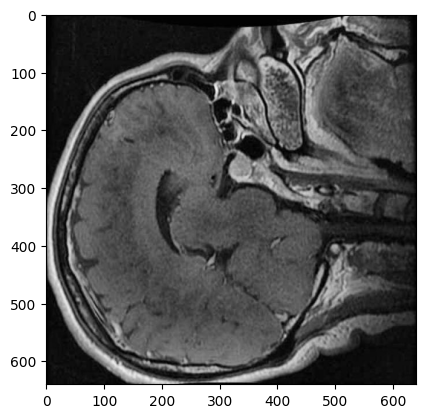

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rand_train_img = random.choice(train_files)
rand_train_img = mpimg.imread(f"./data/train/{rand_train_img}")

plt.imshow(rand_train_img)
plt.show()

In [6]:
import json

IMG = []

with open('./data/train/_annotations.coco.json') as f:
    train_json = json.load(f)
    for img in train_json['images']:
        IMG.append({"id": img['id'], "file_name": img['file_name']})

IMG[1]

{'id': 1, 'file_name': '2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg'}

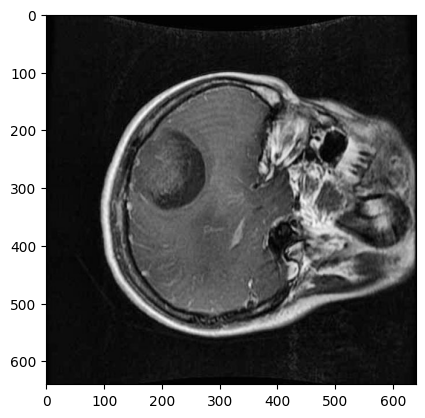

In [7]:
# 1'st image in list
img = mpimg.imread(f"./data/train/{IMG[2]['file_name']}") 
plt.imshow(img)
plt.show()

In [8]:
ANN = []

with open('./data/train/_annotations.coco.json') as f:
    train_json = json.load(f)
    for ann in train_json['annotations']:
        ANN.append({
            "img_id": ann['image_id'],
            "bbox": ann['bbox'],
            "seg": ann['segmentation']
        })

ANN[1]

{'img_id': 1,
 'bbox': [194, 176, 148.75, 233.75],
 'seg': [[342.5,
   176.25,
   193.75,
   176.25,
   193.75,
   410,
   342.5,
   410,
   342.5,
   176.25]]}

In [9]:
def get_img_by_id(ann_img_id: int, IMG):
    for img in IMG:
        if img['id'] == ann_img_id:
            return img['file_name']

In [10]:
res = get_img_by_id(1, IMG)
res == IMG[1]['file_name']

True

In [11]:
for img in ANN:
    img['file_name'] = get_img_by_id(img['img_id'], IMG)

ANN[1]

{'img_id': 1,
 'bbox': [194, 176, 148.75, 233.75],
 'seg': [[342.5,
   176.25,
   193.75,
   176.25,
   193.75,
   410,
   342.5,
   410,
   342.5,
   176.25]],
 'file_name': '2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg'}

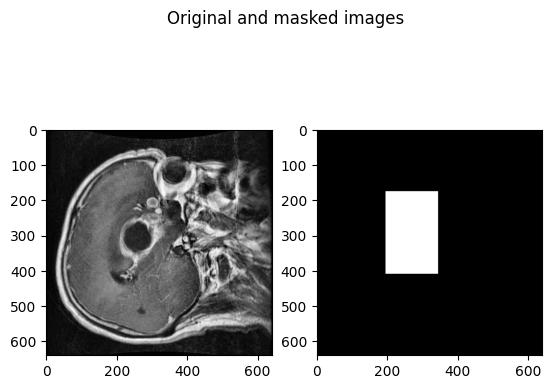

In [12]:
import cv2
import numpy as np

IMG_ID = 1
ann_img_data = ANN[IMG_ID]

img = cv2.imread(f"./data/train/{ann_img_data['file_name']}")

color = (0, 255, 0)

bbox = ann_img_data['bbox']
seg = ann_img_data['seg']

mask = np.zeros_like(img)

x, y, w, h = map(int, map(round, bbox))
mask[y:y+h, x:x+w] = (255, 255, 255)

result = cv2.bitwise_or(img, mask)
result_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Original and masked images')
plt1.imshow(img)
plt2.imshow(result_rgb)
plt.show()